# Dacon Cup 2020
> Analyze and predict user pattern by using user data

# Table of Contents
1. [Problem Definition & Domain Research](#ProblemDefinition&DomainResearch)  
    1.1 [Problem Definiton](#problemdefinition)  
    1.2 [Data](#data)  
    1.3 [Domain Research & Questions](#domain)  
2. [Acquire training and testig data : Data Loading](#dataloading)  
    2.1 [Package Loading & Basic Setting](#package)  
    2.2 [Data Loading](#loading)  
3. [Data Analyze (EDA) & Preprocessing (Wrangle, Cleanse)](#EDA&Wrangling)  
    3.1 [Analyze by describing data (Quick-view)¶](#quick)  
    3.2 [Assumption in 5-fundamental ways](#assumption)  
    3.3 [Analyze by pivoting features](#pivoting)  
    3.4 [Analyze by visualizing data in 5 ways](#visual)  
    3.5 [Wrangle data](#wrangle)  
4. [Modeling, Predict and Solve the problem](#modeling)  
    4.1 [Listing possible model](#modellisting)  
    4.2 [Modeling](#predicting)  

# 1. Problem Definition & Domain Research<a name="ProblemDefinition&DomainResearch"></a>
## 1.1 Problem Definiton<a name="problemdefinition"></a>
### 1.1.1 Topic
- 과거의 데이콘 데이터를 활용한 미래의 사용자 행동 패턴을 예측

### 1.1.2 Background
- 전체 회원 약 2만명, 약 3만 회의 대회 참여, 47개의 공식 대회 개최, 총 상금 3억 7천만원이라는 국내 최대 규모의 인공지능 컴피티션 플랫폼데이콘입니다.
- 2020년 한 해를 마무리하며 데이콘의 사용자 행동 데이터를 바탕으로 하는 대회를 주최합니다.

### 1.1.3 Purpose 
- 지난 2년 동안의 데이콘에 관한 여러가지 데이터가 주어집니다. 이 데이터를 통해서 사용자 움직임을 예측하고자 합니다.

### 1.1.4 Host  

## 1.2 Data<a name="data"></a>
### 1.2.1 Dictionary
- 2018.09.09 ~ 2020.11.08 기간동안 기록된 한시간 간격의 사용자 행동 데이터
    - 사용자 수 : 
    - 세션 수 : 모든 사용자가 시작한 개별 세션 수
      - 사용자가 사이트를 방문한 후 30분 이상 어떤 작업도 수행하지 않은 경우 이후에 발생한 모든 작업은 새로운 세션으로 간주
      - 사용자가 사이트를 떠났다가 30분 내에 다시 방문하면 해당 방문은 원래 세션의 일부로 기록
      - 언제든지 최초 세션의 방문자는 새로운 세션 및 새로운 사용자로 간주
      - 이 기간에 동일한 사용자가 추가로 발생시키는 세션은 추가 세션으로 집계되지만, 추가 사용자로는 집계되지 않음
    - 신규 방문자 수
    - 페이지 뷰 수

## 1.3 Domain Research & Questions<a name="domain"></a>
- Questions

# 2. Acquire training and testig data : Data Loading¶<a name="dataloading"></a>
## 2.1 Package Loading & Basic Setting<a name="package"></a>

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim
torch.manual_seed(1015)
# define 'device' to upload tensor in gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## 2.2 Data Loading<a name="loading"></a>

In [15]:
# directory set
import os
os.chdir("/Users/harryjeong/DA/Project/dacon_cup2020")

# read data by glob
import glob

path = "./data/*.csv"
flist = glob.glob(path)
flist = sorted(flist)
flist

['./data/info_competition.csv',
 './data/info_login.csv',
 './data/info_submission.csv',
 './data/info_user.csv',
 './data/submission.csv',
 './data/train.csv']

In [42]:
info_competition = pd.read_csv(flist[0], encoding = 'euc-kr').iloc[:, 1:].drop(['name_eng', 'keyword_eng'], axis = 1)
info_login = pd.read_csv(flist[1], encoding = 'euc-kr').iloc[:, 1:]
info_submission = pd.read_csv(flist[2], encoding = 'euc-kr').iloc[:, 1:]
info_user = pd.read_csv(flist[3], encoding = 'euc-kr').iloc[:, 1:]
submission = pd.read_csv(flist[4], encoding = 'euc-kr')
train = pd.read_csv(flist[5], encoding = 'euc-kr')

In [43]:
train.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18


In [44]:
info = [info_competition, info_login, info_submission, info_user]
for i in info :
    print(i.head())

   cpt_id  is_official     period_start        period_end                name  \
0     136            1  2018-08-14 0:00  2018-09-13 23:59  대출 상점 총 매출 예측 경진대회   
1    9565            1  2018-09-15 0:00  2018-10-13 23:59  병원 개/폐업 분류 예측 경진대회   
2   17801            1  2018-10-18 0:00  2018-12-31 23:59    아파트 경매가격 예측 경진대회   
3   21265            1  2018-11-13 0:00  2019-01-31 23:59         아파트 실거래가 예측   
4   42473            1  2018-12-25 0:00  2019-01-10 23:59     신용카드 거래 데이터 시각화   

                                             keyword  participants  \
0  금융 | 소상공인 신용카드 가맹점 빅데이터와 AI로 매출 예측 |  시계열, 회귀 ...           303   
1   금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 |  분류 | Accuracy           448   
2   금융 | 부동산 아파트 경매 빅데이터와 AI로 경매가 예측 분석 |  회귀 | RMSE           316   
3    금융 | 부동산 빅데이터와 AI를 이용하여 실거래가를 예측 분석 | 회귀 | RMSE           568   
4  금융 | 신용카드, 시계열, 시각화 | Python, R, Tableau, Spot...           252   

   max_team_member  max_file_per_day  prize            prize_info  \
0                5     

# 3. Data Analyze (EDA) & Preprocessing (Wrangle, Cleanse)<a name="EDA&Wrangling"></a>
## 3.1 Analyze by describing data (Quick-view)¶<a name="quick"></a>
### 3.1.1 Check columns (name)

In [46]:
train.columns.values

array(['DateTime', '사용자', '세션', '신규방문자', '페이지뷰'], dtype=object)

In [49]:
info_name = ['info_competition', 'info_login', 'info_submission', 'info_user']
for i, j in zip(info, info_name) :
    print(j, "'s columns :", i.columns.values)

info_competition 's columns : ['cpt_id' 'is_official' 'period_start' 'period_end' 'name' 'keyword'
 'participants' 'max_team_member' 'max_file_per_day' 'prize' 'prize_info'
 'merge_deadline' 'winner_show']
info_login 's columns : ['login_id' 'user_id' 'c_time' 'platform' 'browser']
info_submission 's columns : ['sub_id' 'cpt_id' 'team_id' 'user_id' 'c_time']
info_user 's columns : ['id' 'c_time' 'entered_competition_cnt' 'code_share_cnt' 'talk_board_cnt'
 'country_code' 'python_level' 'ds_level']


### 3.1.2 Check feature type
1) Categorical
- Categorical
- Ordinal  

2) Numerical
- Continous : 사용자, 세션, 신규방문자, 페이지뷰
- Discrete

### 3.1.3 Check errors or typos


### 3.1.4 Check blank, null or empty values & data types
- integer or floats or strings(objects)  
    df.info()
- no NULL
- **DateTime은 datetime으로 변경해주기**

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19008 entries, 0 to 19007
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  19008 non-null  object
 1   사용자       19008 non-null  int64 
 2   세션        19008 non-null  int64 
 3   신규방문자     19008 non-null  int64 
 4   페이지뷰      19008 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 742.6+ KB


### 3.1.5 Check distribution of numerical feature values
    df.describe()


In [52]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
사용자,19008.0,45.633944,55.111373,0.0,9.0,21.0,70.0,668.0
세션,19008.0,45.280356,54.534009,0.0,9.0,21.0,70.0,815.0
신규방문자,19008.0,11.169613,15.108557,0.0,2.0,6.0,15.0,335.0
페이지뷰,19008.0,1009.841435,1588.200273,0.0,69.0,270.0,1277.0,27884.0


## 3.2 Assumption in 5-fundamental ways<a name="assumption"></a>
>We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

### 3.2.1 Correlating.
Correlating. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.
- correlation btw dependant variable and each explanatory variable

### 3.2.2 Completing.
Completing. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.
- ex) there is no missing values

### 3.2.3 Correcting.
Correcting. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.
- ex) Q_Ques may be dropped as it contains relative number of time (each Q_Time's total is same) & it is hard to find the relation btw Answering time & Reliability.
- ex) W_Ques may be dropped as we could not find any relation with voted or other features.
- ex) some of features in human group may be dropped as it does not have any relation with voted or others: hand, engnat, familysize.

### 3.2.4 Creating.
Creating. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.
- ex) We may create a new feature called mach_score based on the concept of the maki test.
- ex) We may create a new feature called tp_score based on the concpet of TIPI test.

### 3.2.5 Classifying.
Classifying. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.
- ex) 10s are more likely not to have voted. (under the voting age)
- ex) The educated are more likely to have voted.
- ex) The people with High mach_score are more likely to have voted.

## 3.3 Analyze by pivoting features<a name="pivoting"></a>
### Dependant variable vs each Explanatory variable
- To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other.
- ex) We can only do so at this stage for features which do not have any empty values.
It also makes sense doing so only for features which are categorical (human), ordinal (Q_Ques, TP_Ques, age_group) or discrete (familysize) type.

### Summary
- ex) The voted rate is 0.55. (24898 voted, 20634 not voted out of 45532).
- ex) education, age_group, married are strongly related to the voted rate. (classifying)
- ex) engnat, gender, hand, race, religion, urban, familysize are not clearly related to the voted rate. (completing for familysize, creating)

## 3.4 Analyze by visualizing data in 5 ways<a name="visual"></a>
>Confirming some of our assumptions using visualizations for analyzing the data.

### 3.4.0 Heatmap
>Check correlation btw human features
- ex) (+) Relation : education & married, voted & married, voted & education
- ex) (-) Relation : mach_score & married, mach_score & chin

### 3.4.1 Correlating based on feature types
ex)
- mach_score
   - 56점 이상 높아지면 점점 not voted가 많아짐 => classifying
- tp_score : 큰 의미 없어보임
- age_group + mach_score
   - 10s are the most, but most did not vote and they tend to have high mach_score
   - 40s, 50s, 60s mostly voted and they tend to have relatively low mach_score
   - It seems high mach_score provoke low vote rate and the low is opposite.
- Married might divide into two groups at [0.0, 1.0], [2.0, )
- Education must be an important feature and is already well-grouped.

## 3.5 Wrangle data<a name="wrangle"></a>
>We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

### 3.5.1 Correcting by dropping features
This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.
- Based on our assumptions and decisions we want to drop **'engnat, gender, hand, race, religion, urban, familysize'**  features.
- Based on our assumptions and decisions we also want to drop **'Q_Ques', 'Q_Time', 'W_Ques', **  features.

### 3.5.2 Creating new feature extracting from existing
- age, mach, married may be considered to create new feature by banding.

- mach_score
   - 56점 이상 높아지면 점점 not voted가 많아짐 => classifying
- tp_score : 큰 의미 없어보임
- age_group + mach_score
   - 10s are the most, but most did not vote and they tend to have high mach_score
   - 40s, 50s, 60s mostly voted and they tend to have relatively low mach_score
   - It seems high mach_score provoke low vote rate and the low is opposite.
- Married might divide into two groups at [0.0, 1.0], [2.0, )
- Education must be an important feature and is already well-grouped.

### 3.5.3 Completing a numerical continuous feature (NA)
Now we should start estimating and completing features with missing or null values. 
- familysize seems it has outlier -> but we already eliminated.
   
We can consider three methods to complete a numerical continuous feature.   
1. A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).
2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...
3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

### 3.5.4 Completing a categorical feature (NA)
- There is no NA.

### 3.5.5 Create new feature combining existing features
- We created mach_score & tp_score above.
- We created mach_age above.

### 3.5.6 Converting categorical feature to numeric
- age_group

# 4. Modeling, Predict and Solve the problem<a name="modeling"></a>

## 4.1 Listing possible model<a name="modellisting"></a>
ex)
- Randome Forest
- KNN

## 4.2 Modeling<a name="predicting"></a>
### 4.2.1 data setting
### 4.2.3 Modeling
### 4.2.4 Evaluation(Compare)
### 4.2.5 Tuning, Fold

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import statsmodels.api as sm #arima model
import warnings
warnings.filterwarnings('ignore')

In [73]:
path = '/Users/harryjeong/DA/Project/dacon_cup2020'
train = pd.read_csv("/Users/harryjeong/DA/Project/dacon_cup2020/data/train.csv", encoding = 'euc-kr')
train['DateTime'] = pd.to_datetime(train.DateTime)
train['date'] = train.DateTime.dt.date
train  = train.groupby('date').sum().reset_index()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


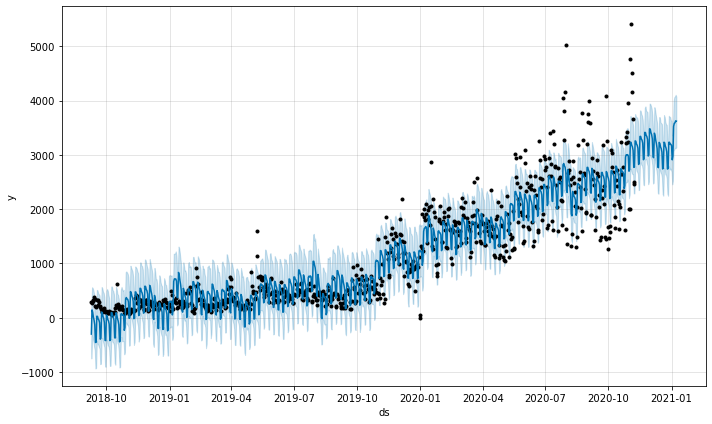

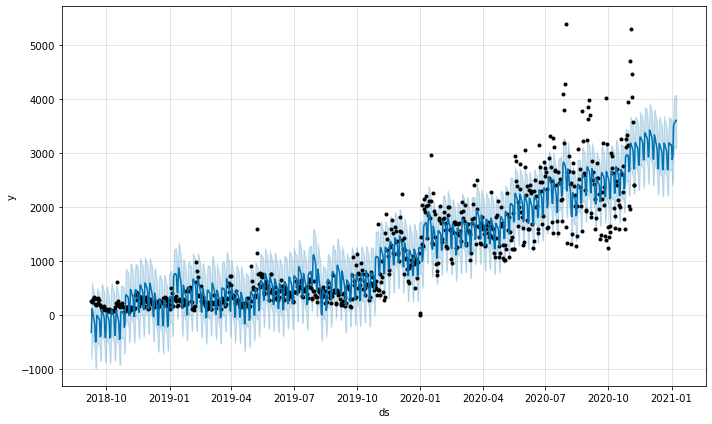

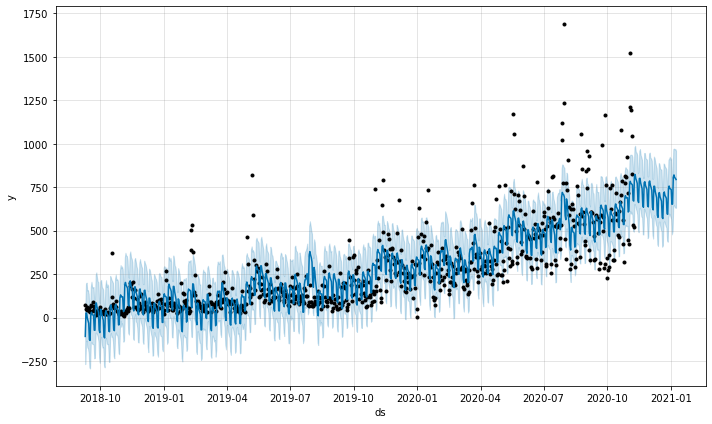

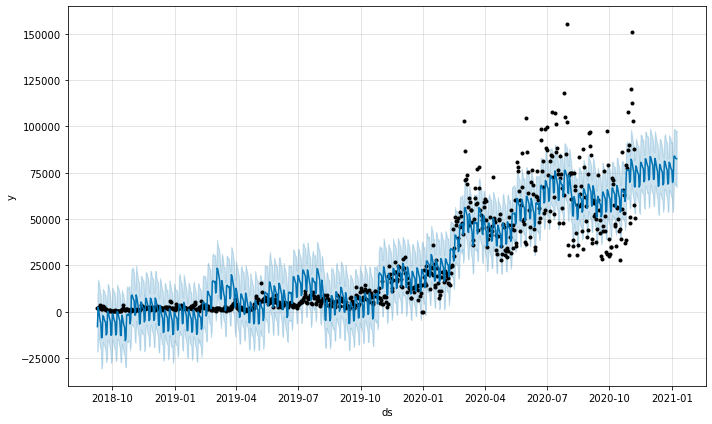

In [93]:
# changepoint_range=0.8
from pandas import DataFrame
sub = DataFrame()
for col in train.columns[1:]:
    df=train[['date',col]]
    df=df.rename(columns = {'date': 'ds',col: 'y'})
    my_model = Prophet(changepoint_prior_scale=0.01,changepoint_range=0.9,
                       seasonality_prior_scale=0.5, holidays_prior_scale=1.0,
                      yearly_seasonality=20,weekly_seasonality=7,seasonality_mode='additive')
    my_model.fit(df)
    future_dates = my_model.make_future_dataframe(periods = 61)
    forecast = my_model.predict(future_dates)
    my_model.plot(forecast)
    sub[col]=forecast['yhat'].tail(n=61).values

In [94]:
sub

,사용자,세션,신규방문자,페이지뷰
0,3258.524240,3198.941722,815.185233,78678.845664
1,3251.353088,3191.554825,822.967996,77901.681619
2,3197.782486,3140.103465,799.222713,76058.520072
3,3177.501630,3126.232973,787.322029,74745.087032
4,3125.125076,3075.864659,772.084932,74215.071960
...,...,...,...,...
56,3523.637967,3501.074164,805.218334,83651.684035
57,3582.022937,3560.531707,820.784272,84053.450689
58,3591.118247,3571.621970,805.252254,83200.289747
59,3627.156394,3612.571528,801.554833,82633.562828


In [53]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim
torch.manual_seed(1015)
# define 'device' to upload tensor in gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [54]:
path = '/Users/harryjeong/DA/Project/dacon_cup2020'
train = pd.read_csv("/Users/harryjeong/DA/Project/dacon_cup2020/data/train.csv", encoding = 'euc-kr')

In [60]:
path = '/Users/harryjeong/DA/Project/dacon_cup2020'
train = pd.read_csv("/Users/harryjeong/DA/Project/dacon_cup2020/data/train.csv", encoding = 'euc-kr')
train['DateTime'] = pd.to_datetime(train.DateTime)
train['date'] = train.DateTime.dt.date
train  = train.groupby('date').sum().reset_index()
train

,date,사용자,세션,신규방문자,페이지뷰
0,2018-09-09,281,266,73,1826
1,2018-09-10,264,247,51,2092
2,2018-09-11,329,310,58,1998
3,2018-09-12,300,287,45,2595
4,2018-09-13,378,344,50,3845
...,...,...,...,...,...
787,2020-11-04,4516,4472,1196,112683
788,2020-11-05,4155,4037,1044,102901
789,2020-11-06,3663,3576,825,88015
790,2020-11-07,2472,2417,531,57386


In [61]:
train.iloc[:,1:].min()

사용자      1
세션       1
신규방문자    1
페이지뷰     2
dtype: int64

In [62]:
train.shape[0]

792

In [67]:
# scaling
mini = train.iloc[:,1:].min()
size = train.iloc[:,1:].max() - train.iloc[:,1:].min()
train.iloc[:,1:] = (train.iloc[:,1:] -  mini) / size

# 
input_window = 30
output_window = 7

window_x = np.zeros((train.shape[0] - (input_window + output_window), input_window, 4))
window_y = np.zeros((train.shape[0] - (input_window + output_window), output_window, 4))

for start in range(train.shape[0] - (input_window + output_window)):
    end = start + input_window    
    window_x[start,:, :] = train.iloc[start : end                , 1: ].values
    window_y[start,:, :] = train.iloc[end   : end + output_window, 1: ].values

In [5]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size = input_size,
                            hidden_size = hidden_size,
                            batch_first=True)
        self.hidden_lstm = nn.LSTM(input_size = hidden_size,
                                   hidden_size = hidden_size,
                                   batch_first=True)
        
        self.time_fc = nn.Linear(hidden_size, 4)
    
    def forward(self, x_time):
    
        out_time, _ = self.lstm(x_time)
        out_time, _ = self.hidden_lstm(out_time)
        out_time, _ = self.hidden_lstm(out_time)
        out_time, _ = self.hidden_lstm(out_time)
        
        
        out_time = self.time_fc(out_time[:,-7:, :])
        
        return out_time.view(-1,7,4)
    
model = LSTM(input_size = 4, hidden_size = 30).to(device)

In [6]:
window_x = torch.tensor(window_x).float().to(device)
window_y = torch.tensor(window_y).float().to(device)

# Train model
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2)
criterion = nn.MSELoss(size_average = True)
num_epochs  = 500
train_error = []
for t in range(num_epochs):
    train_pred = model(window_x)
    loss = criterion(train_pred, window_y) ### trend
    train_error.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 10 == 0 and t !=0:
        print(f"{t} Epochs train MSE: {loss.item():1.5f}")

10 Epochs train MSE: 0.02835
20 Epochs train MSE: 0.01247
30 Epochs train MSE: 0.01237
40 Epochs train MSE: 0.01013
50 Epochs train MSE: 0.00838
60 Epochs train MSE: 0.00804
70 Epochs train MSE: 0.00792
80 Epochs train MSE: 0.00783
90 Epochs train MSE: 0.00772
100 Epochs train MSE: 0.00760
110 Epochs train MSE: 0.00729
120 Epochs train MSE: 0.00674
130 Epochs train MSE: 0.00643
140 Epochs train MSE: 0.00642
150 Epochs train MSE: 0.00618
160 Epochs train MSE: 0.00609
170 Epochs train MSE: 0.00602
180 Epochs train MSE: 0.00594
190 Epochs train MSE: 0.00585
200 Epochs train MSE: 0.00572
210 Epochs train MSE: 0.00550
220 Epochs train MSE: 0.00711
230 Epochs train MSE: 0.00580
240 Epochs train MSE: 0.00550
250 Epochs train MSE: 0.00525
260 Epochs train MSE: 0.00497
270 Epochs train MSE: 0.00583
280 Epochs train MSE: 0.00503
290 Epochs train MSE: 0.00481
300 Epochs train MSE: 0.00444
310 Epochs train MSE: 0.00408
320 Epochs train MSE: 0.00445
330 Epochs train MSE: 0.00408
340 Epochs train MS

In [7]:
submission = pd.read_csv("/Users/harryjeong/DA/Project/dacon_cup2020/data/submission.csv", encoding = 'euc-kr')

In [8]:
submission = pd.read_csv("/Users/harryjeong/DA/Project/dacon_cup2020/data/submission.csv", encoding = 'euc-kr')

#last_month = torch.tensor(window_x[-1,:,:][np.newaxis,...]).float().to(device) <- 수정 전
last_month = train.iloc[-30:,1:].values[np.newaxis,...] # <- 수정 후
last_month = torch.tensor(last_month).float().to(device) # <- 수정 후

for start in range((len(submission) - output_window)//7 + 2):
    start = start * 7
    next_week = model(last_month)
    #last_month = torch.cat([last_month[-7:], next_week], axis = 1) <- 수정 전
    last_month = torch.cat([last_month[:,7:,:], next_week], axis = 1)# <- 수정 후

    pred_week = next_week.cpu().detach().numpy().reshape(output_window,4)
    pred_week = pred_week * size.values + mini.values
    pred_week = pred_week.astype(int)
    
    if start/7 == (len(submission) - output_window)//7 + 1:
        submission.iloc[start :, 1:] = pred_week[-submission.iloc[start :, 1:].shape[0]:,:]
    else:
        submission.iloc[start : start + output_window, 1:] = pred_week
submission

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,2901,3012,702,69519
1,2020-11-10,2804,2825,660,63647
2,2020-11-11,2712,2710,599,58068
3,2020-11-12,2696,2702,578,58279
4,2020-11-13,2306,2318,479,50695
...,...,...,...,...,...
56,2021-01-04,2741,2658,627,70617
57,2021-01-05,2622,2546,606,62725
58,2021-01-06,2134,2132,460,45885
59,2021-01-07,2310,2331,555,48447


In [9]:
submission.to_csv('submission.csv', index = False, encoding = 'euc-kr')

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'